# 1. Import Dependencies

In [173]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, multilabel_confusion_matrix
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 2. Check the coordinates

In [174]:
df_bench = pd.read_csv('./labeling/benchpress_with_scaled_angles.csv')
df_dead = pd.read_csv('./labeling/deadlift_with_scaled_angles.csv')
df_squat = pd.read_csv('./labeling/squat_with_scaled_angles.csv')

In [175]:
df_bench.head()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,left_elbow_angle,right_elbow_angle,left_shoulder_angle,right_shoulder_angle,left_hip_angle,right_hip_angle,left_knee_angle,right_knee_angle,left_ankle_angle,right_ankle_angle
0,b_correct_up,0.342405,0.293187,0.615661,0.999998,0.333918,0.293168,0.662415,0.999998,0.334999,...,153.626526,170.470252,48.070248,105.980023,64.562139,109.855044,152.282714,106.709343,37.642478,51.758124
1,b_correct_down,0.347209,0.290651,0.494753,0.999993,0.336074,0.285710,0.560588,0.999994,0.336740,...,164.207168,44.629975,23.434606,101.919294,63.422402,107.710618,154.459397,110.921968,39.437054,57.581308
2,b_correct_down,0.338909,0.297234,0.494922,0.999994,0.325614,0.295111,0.539178,0.999996,0.326345,...,117.675792,62.403361,4.246507,124.453244,64.934000,108.079105,153.044650,114.738666,38.354746,61.952723
3,b_correct_down,0.342315,0.286979,0.466467,0.999992,0.325819,0.285868,0.529371,0.999994,0.325422,...,159.664459,46.911461,26.222707,93.556948,66.509309,107.797629,149.345123,114.492535,38.428589,62.858692
4,b_correct_up,0.337070,0.292075,0.581475,0.999998,0.329630,0.290616,0.630095,0.999999,0.331256,...,140.004166,164.824528,46.450212,111.923557,68.962632,110.126002,149.106618,115.346571,39.358527,63.642535


In [176]:
df_squat.head()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,left_elbow_angle,right_elbow_angle,left_shoulder_angle,right_shoulder_angle,left_hip_angle,right_hip_angle,left_knee_angle,right_knee_angle,left_ankle_angle,right_ankle_angle
0,s_spine_neutral_down,0.578854,0.459936,-0.178820,0.999752,0.594528,0.448642,-0.173299,0.999830,0.594286,...,80.806623,26.355644,5.900469,43.642237,150.990237,151.839009,151.597463,149.620033,24.727200,34.591380
1,s_spine_neutral_down,0.590740,0.410155,-0.341654,0.999727,0.595270,0.397050,-0.327615,0.999847,0.594844,...,44.327974,26.873086,4.137943,48.484478,166.323610,147.648731,158.852685,146.627404,36.455001,37.264337
2,s_spine_neutral_up,0.572588,0.146920,-0.468999,0.999881,0.573966,0.125410,-0.442385,0.999909,0.573949,...,79.634025,33.591396,37.831483,21.485173,160.834280,162.095840,115.512212,136.782411,33.173339,39.736965
3,s_spine_neutral_up,0.563577,0.157547,-0.483738,0.999883,0.564866,0.136710,-0.457015,0.999882,0.564586,...,79.203730,39.950997,48.968212,10.059519,175.491051,164.419653,134.658955,134.256535,41.718356,39.468728
4,s_spine_neutral_down,0.579107,0.414149,-0.166554,0.999601,0.593653,0.400882,-0.152463,0.999702,0.593684,...,100.755789,28.292219,40.387975,40.373151,154.883739,150.977267,156.115926,146.815038,32.683300,33.705884


In [177]:
df_dead.head()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,left_elbow_angle,right_elbow_angle,left_shoulder_angle,right_shoulder_angle,left_hip_angle,right_hip_angle,left_knee_angle,right_knee_angle,left_ankle_angle,right_ankle_angle
0,s_spine_neutral_down,0.578854,0.459936,-0.178820,0.999752,0.594528,0.448642,-0.173299,0.999830,0.594286,...,80.806623,26.355644,5.900469,43.642237,150.990237,151.839009,151.597463,149.620033,24.727200,34.591380
1,s_spine_neutral_down,0.590740,0.410155,-0.341654,0.999727,0.595270,0.397050,-0.327615,0.999847,0.594844,...,44.327974,26.873086,4.137943,48.484478,166.323610,147.648731,158.852685,146.627404,36.455001,37.264337
2,s_spine_neutral_up,0.572588,0.146920,-0.468999,0.999881,0.573966,0.125410,-0.442385,0.999909,0.573949,...,79.634025,33.591396,37.831483,21.485173,160.834280,162.095840,115.512212,136.782411,33.173339,39.736965
3,s_spine_neutral_up,0.563577,0.157547,-0.483738,0.999883,0.564866,0.136710,-0.457015,0.999882,0.564586,...,79.203730,39.950997,48.968212,10.059519,175.491051,164.419653,134.658955,134.256535,41.718356,39.468728
4,s_spine_neutral_down,0.579107,0.414149,-0.166554,0.999601,0.593653,0.400882,-0.152463,0.999702,0.593684,...,100.755789,28.292219,40.387975,40.373151,154.883739,150.977267,156.115926,146.815038,32.683300,33.705884


# 3. Data Preprocessing & Data Normalization

In [178]:
# 데이터 로드
bench_data = np.loadtxt("./labeling/benchpress_with_scaled_angles.csv", delimiter=",", dtype=str, skiprows=1)
labels = bench_data[:, 0]
bench_data = bench_data[:, 1:]  # 첫 번째 열을 제외한 모든 열 선택

# One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False)
labels = encoder.fit_transform(labels.reshape(-1, 1))

# 결측값 처리
bench_data = np.nan_to_num(bench_data)

bench_data = bench_data.astype(float)

# 데이터 분할
bench_X_train, bench_X_test, bench_y_train, bench_y_test = train_test_split(bench_data, labels, test_size=0.3)

# 텐서 변환
bench_X_train = torch.tensor(bench_X_train)
bench_X_test = torch.tensor(bench_X_test)
bench_y_train = torch.tensor(bench_y_train)
bench_y_test = torch.tensor(bench_y_test)

# float 변환
bench_X_train = bench_X_train.float()
bench_X_test = bench_X_test.float()
bench_y_train = bench_y_train.float()
bench_y_test = bench_y_test.float()

In [179]:
# 데이터 로드
squat_data = np.loadtxt("./labeling/squat_with_scaled_angles.csv", delimiter=",", dtype=str, skiprows=1)
labels_squat = squat_data[:, 0]
squat_data = squat_data[:, 1:]  # 첫 번째 열을 제외한 모든 열 선택

# One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False)
labels_squat = encoder.fit_transform(labels_squat.reshape(-1, 1))

# 결측값 처리
squat_data = np.nan_to_num(squat_data)

squat_data = squat_data.astype(float)

# 데이터 분할
squat_X_train, squat_X_test, squat_y_train, squat_y_test = train_test_split(squat_data, labels_squat, test_size=0.3)

# 텐서 변환
squat_X_train = torch.tensor(squat_X_train)
squat_X_test = torch.tensor(squat_X_test)
squat_y_train = torch.tensor(squat_y_train)
squat_y_test = torch.tensor(squat_y_test)

# float 변환
squat_X_train = squat_X_train.float()
squat_X_test = squat_X_test.float()
squat_y_train = squat_y_train.float()
squat_y_test = squat_y_test.float()

In [180]:
# 데이터 로드
deadlift_data = np.loadtxt("./labeling/deadlift_with_scaled_angles.csv", delimiter=",", dtype=str, skiprows=1)
labels_deadlift = deadlift_data[:, 0]
deadlift_data = deadlift_data[:, 1:]  # 첫 번째 열을 제외한 모든 열 선택

# One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False)
labels_deadlift = encoder.fit_transform(labels_deadlift.reshape(-1, 1))

# 결측값 처리
deadlift_data = np.nan_to_num(deadlift_data)
deadlift_data = np.where(deadlift_data == '', '0', deadlift_data)
deadlift_data = deadlift_data.astype(float)

# 데이터 분할
deadlift_X_train, deadlift_X_test, deadlift_y_train, deadlift_y_test = train_test_split(deadlift_data, labels_deadlift, test_size=0.3)

# 텐서 변환
deadlift_X_train = torch.tensor(deadlift_X_train)
deadlift_X_test = torch.tensor(deadlift_X_test)
deadlift_y_train = torch.tensor(deadlift_y_train)
deadlift_y_test = torch.tensor(deadlift_y_test)

# float 변환
deadlift_X_train = deadlift_X_train.float()
deadlift_X_test = deadlift_X_test.float()
deadlift_y_train = deadlift_y_train.float()
deadlift_y_test = deadlift_y_test.float()

# 4. Construct Deep Learning Model

In [181]:
bench_y_test.shape

torch.Size([287, 6])

In [182]:
bench_X_train.shape

torch.Size([668, 143])

In [183]:
bench_y_train.shape

torch.Size([668, 6])

### Bench Press

In [185]:
class DeepClassifier(nn.Module):
    def __init__(self, input_size, output_size):
        super(DeepClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, output_size)
        self.dropout = nn.Dropout(0.5)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.dropout(self.relu(self.fc2(x)))
        x = self.dropout(self.relu(self.fc3(x)))
        x = self.fc4(x)
        x = self.softmax(x)
        return x

In [189]:
# 모델 생성
input_size = 143
output_size = 6
bench_model = DeepClassifier(input_size, output_size)

In [190]:
bench_criterion = nn.BCELoss()
bench_optimizer = optim.Adam(bench_model.parameters(), lr=0.001)

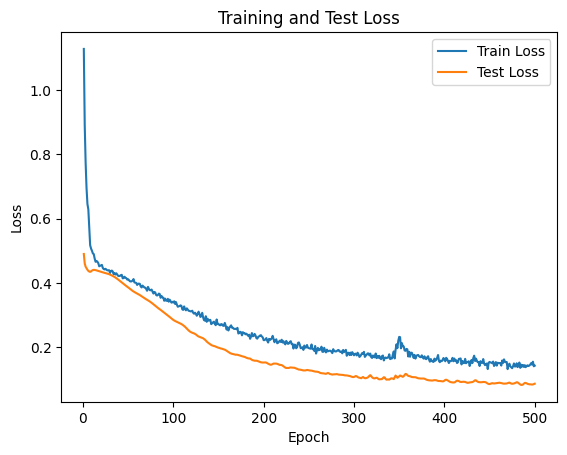

In [191]:
bench_train_losses = []
bench_test_losses = []

epochs = 500

for epoch in range(epochs):
    bench_model.train()
    bench_optimizer.zero_grad()
    bench_outputs = bench_model(bench_X_train)
    bench_loss = bench_criterion(bench_outputs, bench_y_train)
    bench_loss.backward()
    bench_optimizer.step()
    bench_train_losses.append(bench_loss.item())
    
    bench_model.eval()
    with torch.no_grad():
        bench_test_outputs = bench_model(bench_X_test)
        bench_test_loss = bench_criterion(bench_test_outputs, bench_y_test)
        bench_test_losses.append(bench_test_loss.item())

plt.plot(range(1, epochs+1), bench_train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), bench_test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.show()

In [192]:
bench_model.eval()
with torch.no_grad():
    test_outputs = bench_model(bench_X_test)
    test_loss = bench_criterion(test_outputs, bench_y_test)
    print(f'Test Loss: {test_loss.item()}')

Test Loss: 0.08621600270271301


In [193]:
# 테스트 데이터셋에서 샘플 선택
num_samples_to_test = 5  # 확인할 샘플의 수
for i in range(num_samples_to_test):
    sample_index = i
    input_sample = bench_X_test[sample_index]  # 입력 데이터
    target_sample = bench_y_test[sample_index]  # 실제 타겟(정답) 데이터

    # 입력 데이터를 Tensor로 변환
    input_tensor = torch.tensor(input_sample, dtype=torch.float32)

    # 모델에 입력하여 예측 생성
    bench_model.eval()
    with torch.no_grad():
        prediction = bench_model(input_tensor.unsqueeze(0))  # unsqueeze를 사용하여 배치 차원 추가

    # 예측 결과 출력
    print(f"샘플 {sample_index + 1}:")
    print("입력 데이터:", input_sample)
    print("실제 타겟 데이터:", target_sample)
    print("예측된 데이터:", torch.argmax(prediction))  # 확률이 아닌 예측된 클래스를 출력
    probabilities = prediction.squeeze().tolist()  # 텐서를 리스트로 변환
    probabilities_str = [f"{prob:.4f}" for prob in probabilities]
    print("예측 확률:", probabilities_str)
    print()

샘플 1:
입력 데이터: tensor([ 3.8660e-01,  3.0802e-01,  4.0827e-01,  9.9998e-01,  3.7464e-01,
         3.0289e-01,  4.7746e-01,  9.9999e-01,  3.7588e-01,  3.0245e-01,
         4.7748e-01,  9.9999e-01,  3.7684e-01,  3.0232e-01,  4.7720e-01,
         9.9999e-01,  3.6446e-01,  3.0789e-01,  4.2888e-01,  1.0000e+00,
         3.5863e-01,  3.1103e-01,  4.2891e-01,  9.9999e-01,  3.5249e-01,
         3.1448e-01,  4.2889e-01,  1.0000e+00,  3.6988e-01,  3.1342e-01,
         7.6044e-01,  9.9999e-01,  3.3822e-01,  3.2875e-01,  5.1280e-01,
         1.0000e+00,  3.9760e-01,  3.1603e-01,  5.0874e-01,  9.9998e-01,
         3.8809e-01,  3.2095e-01,  4.4122e-01,  9.9999e-01,  4.7420e-01,
         3.4207e-01,  7.9640e-01,  9.9999e-01,  3.4242e-01,  3.8399e-01,
         3.7442e-01,  1.0000e+00,  6.1456e-01,  3.8073e-01,  7.3465e-01,
         1.2434e-01,  3.1173e-01,  4.4796e-01, -1.1705e-01,  9.8480e-01,
         6.6893e-01,  3.5571e-01,  4.6902e-01,  3.0262e-01,  3.1424e-01,
         3.6011e-01, -5.1097e-01,  9.

/var/folders/23/n8c37q85651bywf1rz00z90c0000gn/T/ipykernel_5285/658835650.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_tensor = torch.tensor(input_sample, dtype=torch.float32)


In [194]:
bench_model.eval()
with torch.no_grad():
    predicted_probs = bench_model(bench_X_test)

threshold = 0.8  # 임계값 설정
predicted_labels = (predicted_probs > threshold).numpy().astype(int)

# 정확도 계산
accuracy = accuracy_score(bench_y_test, predicted_labels)
print(f"정확도: {accuracy:.3f}")

# 정밀도 계산
precision = precision_score(bench_y_test, predicted_labels, average='micro')
print(f"정밀도: {precision:.3f}")

# 재현율 계산
recall = recall_score(bench_y_test, predicted_labels, average='micro')
print(f"재현율: {recall:.3f}")

# F1 점수 계산
f1 = f1_score(bench_y_test, predicted_labels, average='micro')
print(f"F1 점수: {f1:.3f}")

정확도: 0.669
정밀도: 0.990
재현율: 0.669
F1 점수: 0.798


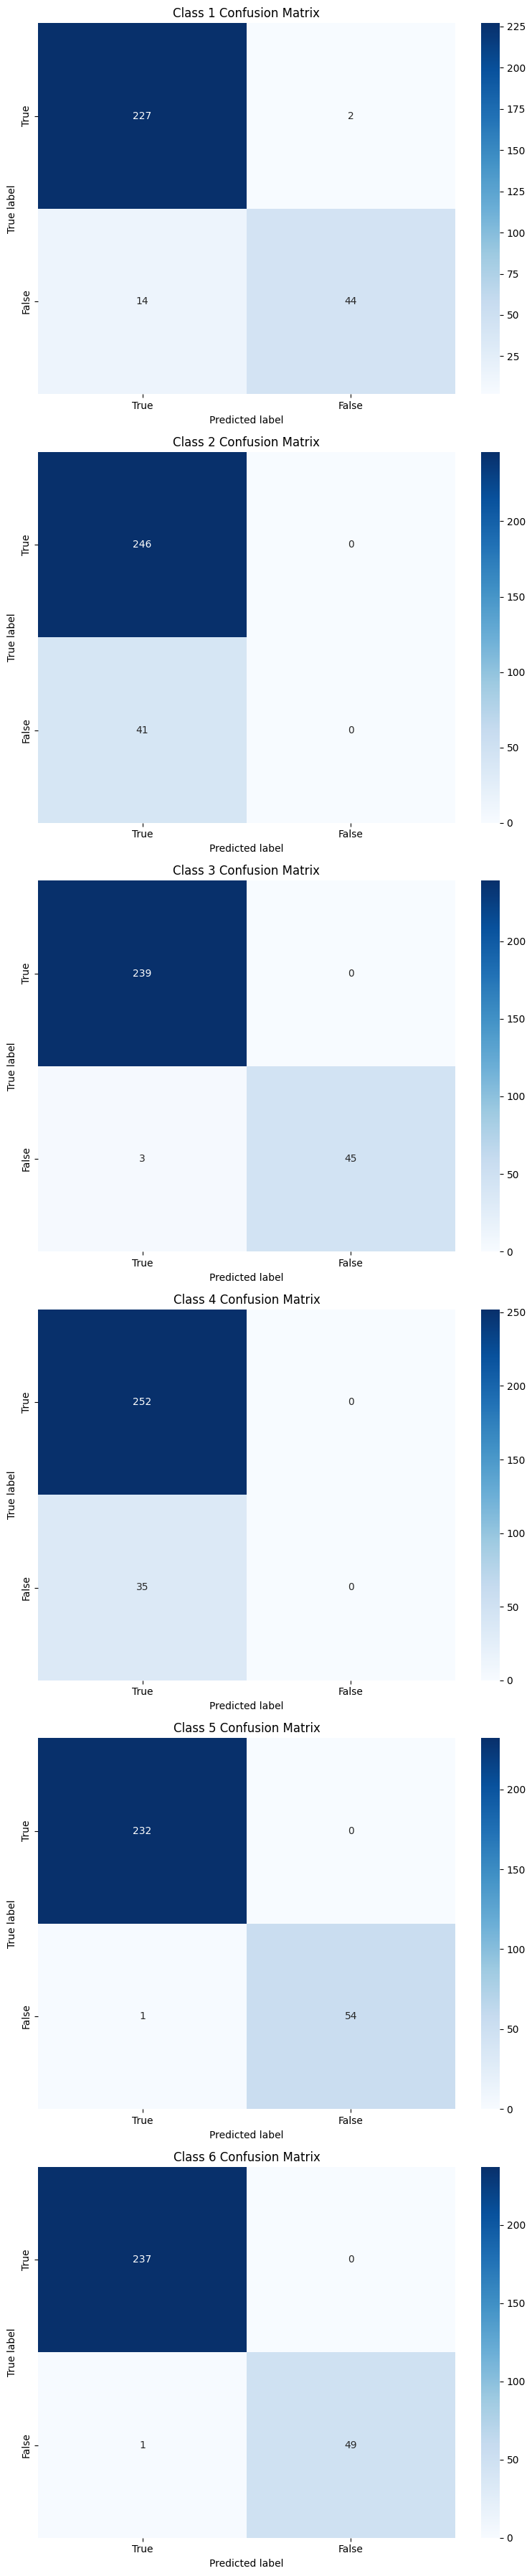

In [195]:
confusion_matrix = multilabel_confusion_matrix(bench_y_test, predicted_labels)

def plot_multilabel_confusion_matrix(confusion_matrix):
    num_classes = len(confusion_matrix)
    fig, axes = plt.subplots(nrows=num_classes, ncols=1, figsize=(8, 6 * num_classes))

    for i in range(num_classes):
        sns.heatmap(confusion_matrix[i], annot=True, cmap="Blues", fmt="d", ax=axes[i])
        axes[i].set_title(f"Class {i+1} Confusion Matrix")
        axes[i].set_xlabel("Predicted label")
        axes[i].set_ylabel("True label")
        axes[i].set_xticklabels(['True', 'False'])
        axes[i].set_yticklabels(['True', 'False'])

    plt.tight_layout()
    plt.show()

# 다중 레이블 오차 행렬 시각화
plot_multilabel_confusion_matrix(confusion_matrix)

### Squat

In [196]:
class DeepClassifier(nn.Module):
    def __init__(self, input_size, output_size):
        super(DeepClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, output_size)
        self.dropout = nn.Dropout(0.5)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.dropout(self.relu(self.fc2(x)))
        x = self.dropout(self.relu(self.fc3(x)))
        x = self.fc4(x)
        x = self.softmax(x)
        return x

In [197]:
# 모델 생성
input_size = 143
output_size = 8
squat_model = DeepClassifier(input_size, output_size)
squat_criterion = nn.BCELoss()
squat_optimizer = optim.Adam(squat_model.parameters(), lr=0.001)

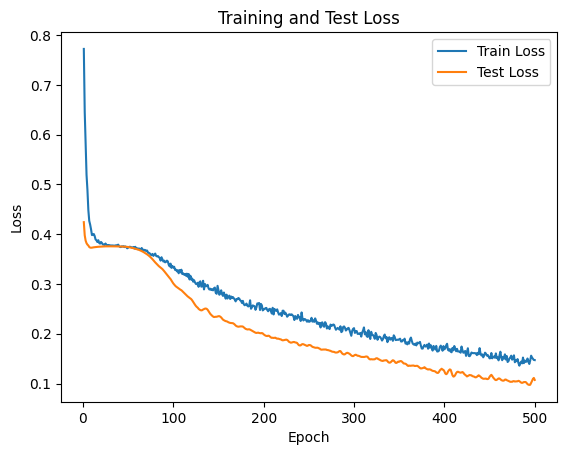

In [198]:
squat_train_losses = []
squat_test_losses = []

epochs = 500

for epoch in range(epochs):
    squat_model.train()
    squat_optimizer.zero_grad()
    squat_outputs = squat_model(squat_X_train)
    squat_loss = squat_criterion(squat_outputs, squat_y_train)
    squat_loss.backward()
    squat_optimizer.step()
    squat_train_losses.append(squat_loss.item())
    
    squat_model.eval()
    with torch.no_grad():
        squat_test_outputs = squat_model(squat_X_test)
        squat_test_loss = squat_criterion(squat_test_outputs, squat_y_test)
        squat_test_losses.append(squat_test_loss.item())

plt.plot(range(1, epochs+1), squat_train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), squat_test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.show()

In [199]:
squat_model.eval()
with torch.no_grad():
    squat_test_outputs = squat_model(squat_X_test)
    squat_test_loss = squat_criterion(squat_test_outputs, squat_y_test)
    print(f'Test Loss: {squat_test_loss.item()}')

Test Loss: 0.10725542157888412


In [200]:
# 테스트 데이터셋에서 샘플 선택
num_samples_to_test = 5  # 확인할 샘플의 수
for i in range(num_samples_to_test):
    sample_index = i
    input_sample = squat_X_test[sample_index]  # 입력 데이터
    target_sample = squat_y_test[sample_index]  # 실제 타겟(정답) 데이터

    # 입력 데이터를 Tensor로 변환
    input_tensor = torch.tensor(input_sample, dtype=torch.float32)

    # 모델에 입력하여 예측 생성
    squat_model.eval()
    with torch.no_grad():
        prediction = squat_model(input_tensor.unsqueeze(0))  # unsqueeze를 사용하여 배치 차원 추가

    # 예측 결과 출력
    print(f"샘플 {sample_index + 1}:")
    print("입력 데이터:", input_sample)
    print("실제 타겟 데이터:", target_sample)
    print("예측된 데이터:", torch.argmax(prediction))  # 확률이 아닌 예측된 클래스를 출력
    probabilities = prediction.squeeze().tolist()  # 텐서를 리스트로 변환
    probabilities_str = [f"{prob:.4f}" for prob in probabilities]
    print("예측 확률:", probabilities_str)
    print()

샘플 1:
입력 데이터: tensor([ 5.4234e-01,  3.3718e-01, -9.8448e-01,  1.0000e+00,  5.5388e-01,
         3.2688e-01, -9.7680e-01,  9.9999e-01,  5.6174e-01,  3.2601e-01,
        -9.7673e-01,  9.9999e-01,  5.6836e-01,  3.2502e-01, -9.7696e-01,
         9.9998e-01,  5.3259e-01,  3.2640e-01, -9.6347e-01,  9.9999e-01,
         5.2606e-01,  3.2537e-01, -9.6366e-01,  9.9999e-01,  5.2092e-01,
         3.2444e-01, -9.6370e-01,  9.9999e-01,  5.8288e-01,  3.1913e-01,
        -7.5725e-01,  9.9998e-01,  5.1693e-01,  3.2056e-01, -7.1023e-01,
         9.9999e-01,  5.5782e-01,  3.4473e-01, -8.9038e-01,  1.0000e+00,
         5.3091e-01,  3.4431e-01, -8.7369e-01,  1.0000e+00,  6.4680e-01,
         3.6111e-01, -4.9861e-01,  9.9995e-01,  4.6960e-01,  3.6166e-01,
        -4.7506e-01,  9.9999e-01,  7.1446e-01,  4.4088e-01, -7.4442e-01,
         9.8796e-01,  3.9288e-01,  4.3068e-01, -7.1833e-01,  9.9825e-01,
         6.7252e-01,  3.8171e-01, -1.1780e+00,  9.7258e-01,  4.1854e-01,
         3.7994e-01, -1.1914e+00,  9.

/var/folders/23/n8c37q85651bywf1rz00z90c0000gn/T/ipykernel_5285/3174289499.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_tensor = torch.tensor(input_sample, dtype=torch.float32)


In [201]:
squat_model.eval()
with torch.no_grad():
    predicted_probs = squat_model(squat_X_test)

threshold = 0.8  # 임계값 설정
predicted_labels = (predicted_probs > threshold).numpy().astype(int)

# 정확도 계산
accuracy = accuracy_score(squat_y_test, predicted_labels)
print(f"정확도: {accuracy:.3f}")

# 정밀도 계산
precision = precision_score(squat_y_test, predicted_labels, average='micro')
print(f"정밀도: {precision:.3f}")

# 재현율 계산
recall = recall_score(squat_y_test, predicted_labels, average='micro')
print(f"재현율: {recall:.3f}")

# F1 점수 계산
f1 = f1_score(squat_y_test, predicted_labels, average='micro')
print(f"F1 점수: {f1:.3f}")

정확도: 0.588
정밀도: 0.982
재현율: 0.588
F1 점수: 0.735


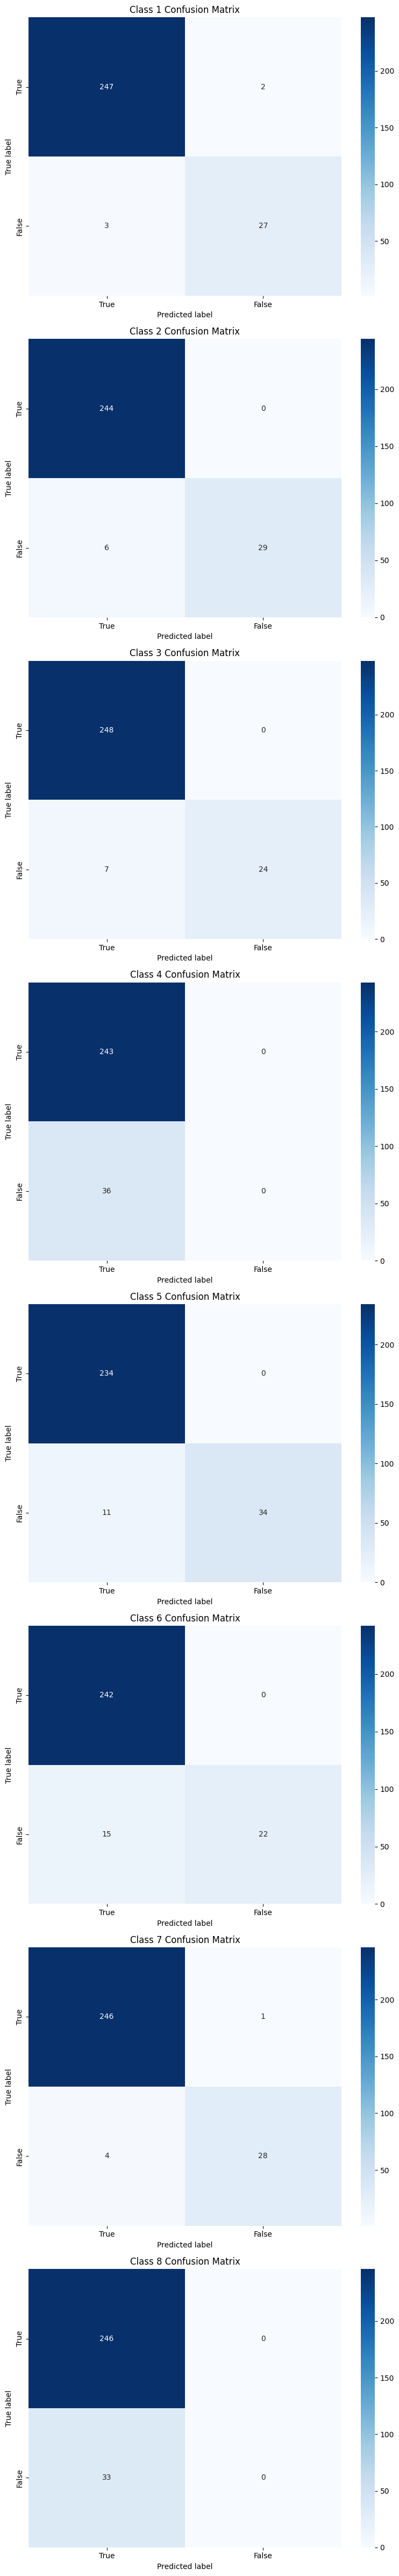

In [202]:
confusion_matrix = multilabel_confusion_matrix(squat_y_test, predicted_labels)

def plot_multilabel_confusion_matrix(confusion_matrix):
    num_classes = len(confusion_matrix)
    fig, axes = plt.subplots(nrows=num_classes, ncols=1, figsize=(8, 6 * num_classes))

    for i in range(num_classes):
        sns.heatmap(confusion_matrix[i], annot=True, cmap="Blues", fmt="d", ax=axes[i])
        axes[i].set_title(f"Class {i+1} Confusion Matrix")
        axes[i].set_xlabel("Predicted label")
        axes[i].set_ylabel("True label")
        axes[i].set_xticklabels(['True', 'False'])
        axes[i].set_yticklabels(['True', 'False'])

    plt.tight_layout()
    plt.show()

# 다중 레이블 오차 행렬 시각화
plot_multilabel_confusion_matrix(confusion_matrix)

### Deadlift

In [203]:
class DeepClassifier(nn.Module):
    def __init__(self, input_size, output_size):
        super(DeepClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, output_size)
        self.dropout = nn.Dropout(0.5)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.dropout(self.relu(self.fc2(x)))
        x = self.dropout(self.relu(self.fc3(x)))
        x = self.fc4(x)
        x = self.softmax(x)
        return x

In [205]:
# 모델 생성
input_size = 143
output_size = 8
deadlift_model = DeepClassifier(input_size, output_size)
deadlift_criterion = nn.BCELoss()
deadlift_optimizer = optim.Adam(deadlift_model.parameters(), lr=0.001)

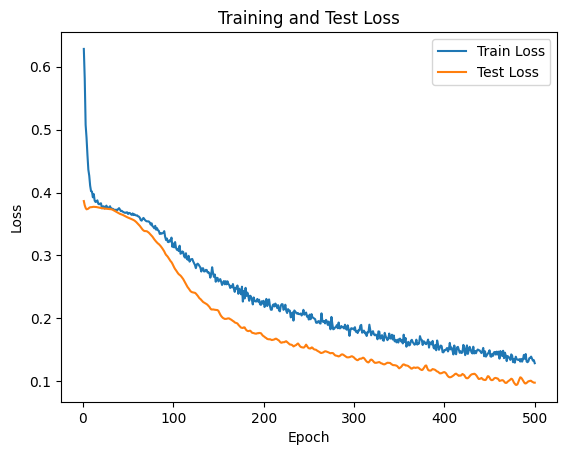

In [206]:
deadlift_train_losses = []
deadlift_test_losses = []

epochs = 500

for epoch in range(epochs):
    deadlift_model.train()
    deadlift_optimizer.zero_grad()
    deadlift_outputs = deadlift_model(deadlift_X_train)
    deadlift_loss = deadlift_criterion(deadlift_outputs, deadlift_y_train)
    deadlift_loss.backward()
    deadlift_optimizer.step()
    deadlift_train_losses.append(deadlift_loss.item())
    
    deadlift_model.eval()
    with torch.no_grad():
        deadlift_test_outputs = deadlift_model(deadlift_X_test)
        deadlift_test_loss = deadlift_criterion(deadlift_test_outputs, deadlift_y_test)
        deadlift_test_losses.append(deadlift_test_loss.item())

plt.plot(range(1, epochs+1), deadlift_train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), deadlift_test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.show()

In [207]:
deadlift_model.eval()
with torch.no_grad():
    deadlift_test_outputs = deadlift_model(deadlift_X_test)
    deadlift_test_loss = deadlift_criterion(deadlift_test_outputs, deadlift_y_test)
    print(f'Test Loss: {deadlift_test_loss.item()}')

Test Loss: 0.09784714877605438


In [208]:
# 테스트 데이터셋에서 샘플 선택
num_samples_to_test = 5  # 확인할 샘플의 수
for i in range(num_samples_to_test):
    sample_index = i
    input_sample = deadlift_X_test[sample_index]  # 입력 데이터
    target_sample = deadlift_y_test[sample_index]  # 실제 타겟(정답) 데이터

    # 입력 데이터를 Tensor로 변환
    input_tensor = torch.tensor(input_sample, dtype=torch.float32)

    # 모델에 입력하여 예측 생성
    deadlift_model.eval()
    with torch.no_grad():
        prediction = deadlift_model(input_tensor.unsqueeze(0))  # unsqueeze를 사용하여 배치 차원 추가

    # 예측 결과 출력
    print(f"샘플 {sample_index + 1}:")
    print("입력 데이터:", input_sample)
    print("실제 타겟 데이터:", target_sample)
    print("예측된 데이터:", torch.argmax(prediction))  # 확률이 아닌 예측된 클래스를 출력
    probabilities = prediction.squeeze().tolist()  # 텐서를 리스트로 변환
    probabilities_str = [f"{prob:.4f}" for prob in probabilities]
    print("예측 확률:", probabilities_str)
    print()

샘플 1:
입력 데이터: tensor([ 5.4232e-01,  3.2144e-01, -1.0854e+00,  9.9999e-01,  5.5346e-01,
         3.1023e-01, -1.0759e+00,  9.9997e-01,  5.6161e-01,  3.0934e-01,
        -1.0758e+00,  9.9997e-01,  5.6878e-01,  3.0822e-01, -1.0761e+00,
         9.9993e-01,  5.3254e-01,  3.1097e-01, -1.0640e+00,  9.9997e-01,
         5.2603e-01,  3.1069e-01, -1.0642e+00,  9.9997e-01,  5.2115e-01,
         3.1020e-01, -1.0642e+00,  9.9997e-01,  5.8284e-01,  3.0388e-01,
        -8.5808e-01,  9.9994e-01,  5.1902e-01,  3.0731e-01, -8.0472e-01,
         9.9998e-01,  5.5830e-01,  3.2985e-01, -9.9130e-01,  9.9999e-01,
         5.3205e-01,  3.2995e-01, -9.7631e-01,  9.9999e-01,  6.4599e-01,
         3.4793e-01, -5.9829e-01,  9.9995e-01,  4.7229e-01,  3.4836e-01,
        -5.7003e-01,  9.9999e-01,  7.3353e-01,  4.1616e-01, -9.1262e-01,
         9.8997e-01,  3.7904e-01,  4.1005e-01, -8.6164e-01,  9.9787e-01,
         6.8188e-01,  3.5692e-01, -1.3587e+00,  9.7798e-01,  4.1374e-01,
         3.4881e-01, -1.3425e+00,  9.

/var/folders/23/n8c37q85651bywf1rz00z90c0000gn/T/ipykernel_5285/2186968047.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_tensor = torch.tensor(input_sample, dtype=torch.float32)


In [209]:
deadlift_model.eval()
with torch.no_grad():
    predicted_probs = deadlift_model(deadlift_X_test)

threshold = 0.8  # 임계값 설정
predicted_labels = (predicted_probs > threshold).numpy().astype(int)

# 정확도 계산
accuracy = accuracy_score(deadlift_y_test, predicted_labels)
print(f"정확도: {accuracy:.3f}")

# 정밀도 계산
precision = precision_score(deadlift_y_test, predicted_labels, average='micro')
print(f"정밀도: {precision:.3f}")

# 재현율 계산
recall = recall_score(deadlift_y_test, predicted_labels, average='micro')
print(f"재현율: {recall:.3f}")

# F1 점수 계산
f1 = f1_score(deadlift_y_test, predicted_labels, average='micro')
print(f"F1 점수: {f1:.3f}")

정확도: 0.602
정밀도: 0.955
재현율: 0.602
F1 점수: 0.738


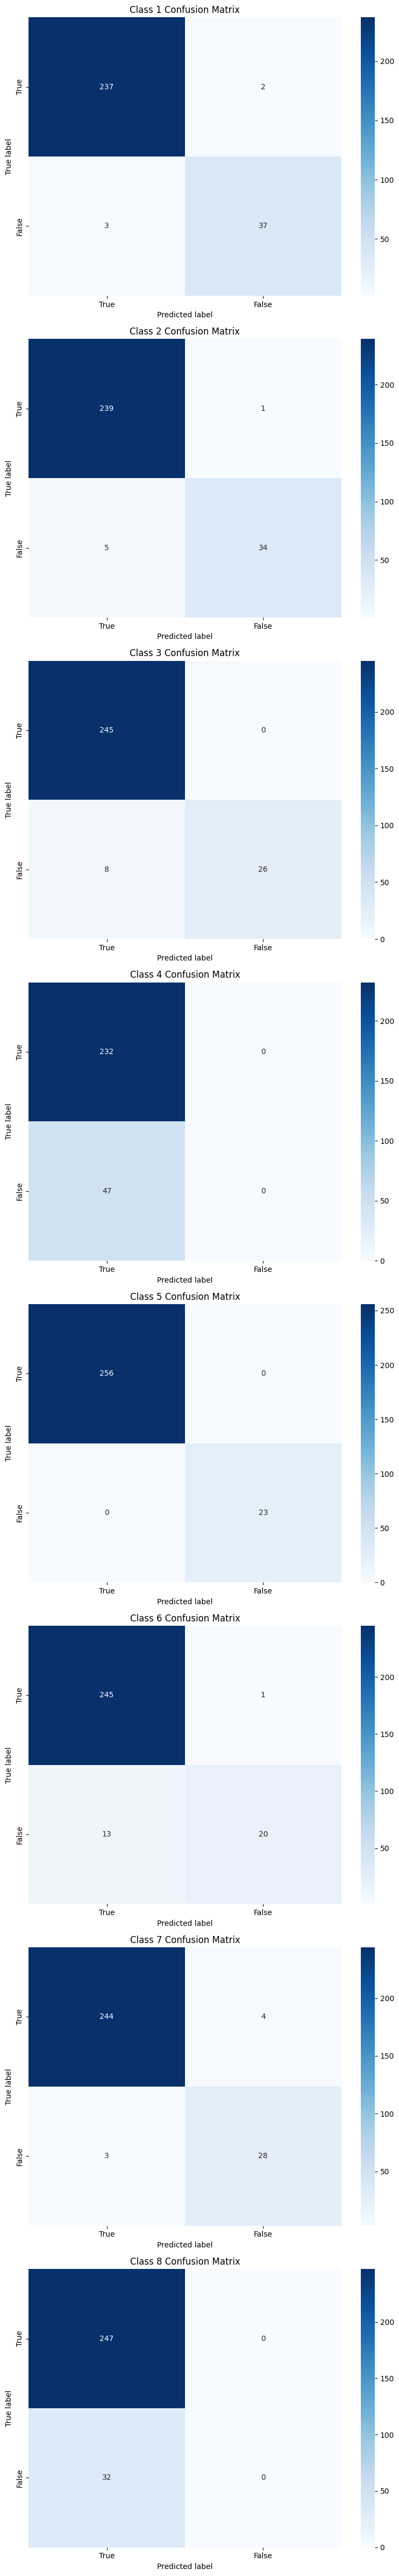

In [210]:
confusion_matrix = multilabel_confusion_matrix(deadlift_y_test, predicted_labels)

def plot_multilabel_confusion_matrix(confusion_matrix):
    num_classes = len(confusion_matrix)
    fig, axes = plt.subplots(nrows=num_classes, ncols=1, figsize=(8, 6 * num_classes))

    for i in range(num_classes):
        sns.heatmap(confusion_matrix[i], annot=True, cmap="Blues", fmt="d", ax=axes[i])
        axes[i].set_title(f"Class {i+1} Confusion Matrix")
        axes[i].set_xlabel("Predicted label")
        axes[i].set_ylabel("True label")
        axes[i].set_xticklabels(['True', 'False'])
        axes[i].set_yticklabels(['True', 'False'])

    plt.tight_layout()
    plt.show()

# 다중 레이블 오차 행렬 시각화
plot_multilabel_confusion_matrix(confusion_matrix)